### Party-wise Analysis (Liberal Party)


In [2]:
import pandas as pd
df = pd.read_csv(r'C:\Users\Yathin Muthavarapu\Desktop\Capstone-2/liberal_df.csv')
print(df.head())

     party                                                url  \
0  liberal  https://www.liberal.ca/gender-equality-week-st...   
1  liberal  https://www.liberal.ca/justin-trudeau-and-soph...   
2  liberal  https://www.liberal.ca/justin-trudeau-joins-su...   
3  liberal  https://www.liberal.ca/liberals-nominate-rache...   
4  liberal  https://www.liberal.ca/justin-trudeau-joins-su...   

                                             content        date  
0  \n\nShare\n\n\n\n\n\nToday, the Leader of the ...  2019-09-22  
1  \n\nShare\n\n\n\n\n\nSaguenay, QC – Justin Tru...  2018-06-13  
2  \n\nShare\n\n\n\n\n\nCobourg, ON – Justin Trud...  2018-10-18  
3  \n\nShare\n\n\n\n\n\nOutremont, QC- Local Libe...  2018-12-16  
4  \n\nShare\n\n\n\n\n\nOttawa, ON – Justin Trude...  2019-09-09  


In [3]:
df.shape

(200, 4)

In [4]:
import re

def clean_text(text):
    # Remove extra whitespace
    text = ' '.join(text.split())

    # Remove non-alphanumeric characters (except spaces)
    text = re.sub(r'[^\w\s]', '', text)

    # Convert to lowercase
    text = text.lower()

    return text

df['cleaned_content'] = df['content'].astype(str).apply(clean_text)

print(df.head())

     party                                                url  \
0  liberal  https://www.liberal.ca/gender-equality-week-st...   
1  liberal  https://www.liberal.ca/justin-trudeau-and-soph...   
2  liberal  https://www.liberal.ca/justin-trudeau-joins-su...   
3  liberal  https://www.liberal.ca/liberals-nominate-rache...   
4  liberal  https://www.liberal.ca/justin-trudeau-joins-su...   

                                             content        date  \
0  \n\nShare\n\n\n\n\n\nToday, the Leader of the ...  2019-09-22   
1  \n\nShare\n\n\n\n\n\nSaguenay, QC – Justin Tru...  2018-06-13   
2  \n\nShare\n\n\n\n\n\nCobourg, ON – Justin Trud...  2018-10-18   
3  \n\nShare\n\n\n\n\n\nOutremont, QC- Local Libe...  2018-12-16   
4  \n\nShare\n\n\n\n\n\nOttawa, ON – Justin Trude...  2019-09-09   

                                     cleaned_content  
0  share today the leader of the liberal party of...  
1  share saguenay qc  justin trudeau leader of th...  
2  share cobourg on  justin trudeau

## Overall Sentiment Distribution

In [6]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download the VADER lexicon
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()
df['sentiment_scores'] = df['cleaned_content'].apply(lambda x: sia.polarity_scores(x))
df['compound_sentiment'] = df['sentiment_scores'].apply(lambda x: x['compound'])

def categorize_sentiment(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_category'] = df['compound_sentiment'].apply(categorize_sentiment)

sentiment_distribution = df['sentiment_category'].value_counts(normalize=True)
print("Overall Sentiment Distribution:")
print(sentiment_distribution)

average_sentiment = df['compound_sentiment'].mean()
print(f"\nAverage Sentiment Score: {average_sentiment:.2f}")

[nltk_data] Downloading package vader_lexicon to C:\Users\Yathin
[nltk_data]     Muthavarapu\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Overall Sentiment Distribution:
sentiment_category
Positive    0.94
Negative    0.06
Name: proportion, dtype: float64

Average Sentiment Score: 0.85


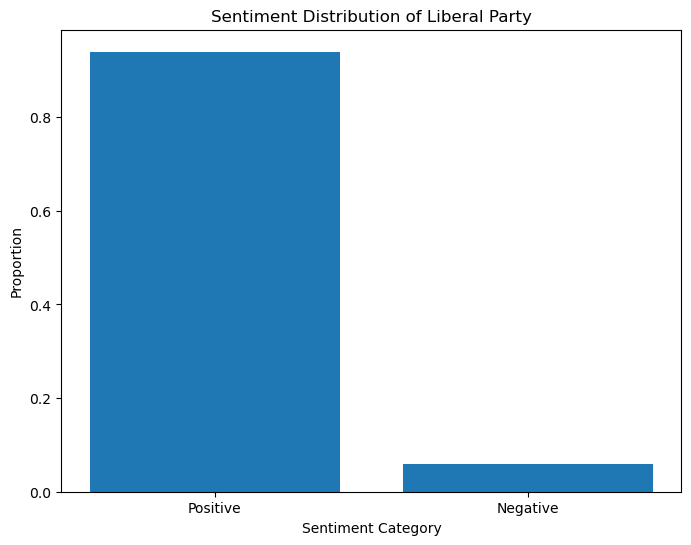

In [7]:
import matplotlib.pyplot as plt

# Assuming sentiment_distribution is already calculated as in your provided code.
sentiment_distribution = df['sentiment_category'].value_counts(normalize=True)

plt.figure(figsize=(8, 6))
plt.bar(sentiment_distribution.index, sentiment_distribution.values)
plt.title('Sentiment Distribution of Liberal Party')
plt.xlabel('Sentiment Category')
plt.ylabel('Proportion')
plt.show()

## Temporal Sentiment Analysis

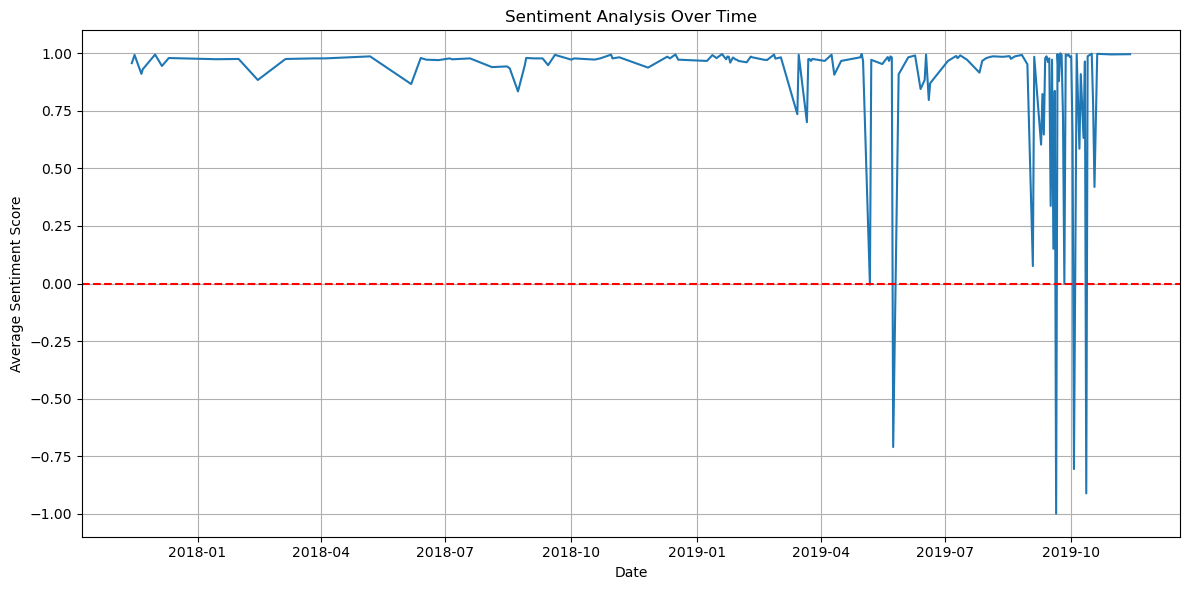

In [9]:
import matplotlib.pyplot as plt

# Convert date to datetime if not already
df['date'] = pd.to_datetime(df['date'])

# Apply sentiment analysis if not already done
sia = SentimentIntensityAnalyzer()
df['sentiment_score'] = df['content'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Group by date and calculate average sentiment
daily_sentiment = df.groupby('date')['sentiment_score'].mean().reset_index()

# Plot the sentiment over time
plt.figure(figsize=(12, 6))
plt.plot(daily_sentiment['date'], daily_sentiment['sentiment_score'])
plt.title('Sentiment Analysis Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.grid(True)
plt.tight_layout()
plt.show()

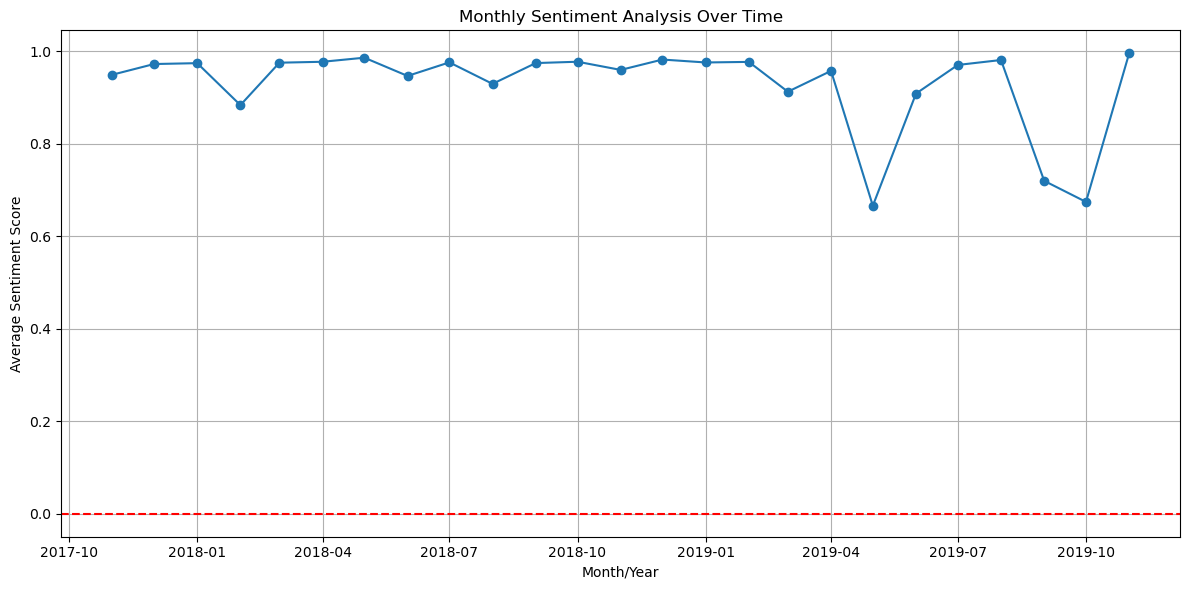

In [10]:
# Create a new column for month/year
df['month_year'] = df['date'].dt.to_period('M')

# Group by month/year and calculate average sentiment
monthly_sentiment = df.groupby('month_year')['sentiment_score'].mean().reset_index()

# Convert month_year back to datetime for plotting
monthly_sentiment['month_year'] = monthly_sentiment['month_year'].dt.to_timestamp()

# Plot the sentiment over time
plt.figure(figsize=(12, 6))
plt.plot(monthly_sentiment['month_year'], monthly_sentiment['sentiment_score'], marker='o')
plt.title('Monthly Sentiment Analysis Over Time')
plt.xlabel('Month/Year')
plt.ylabel('Average Sentiment Score')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.grid(True)
plt.tight_layout()
plt.show()

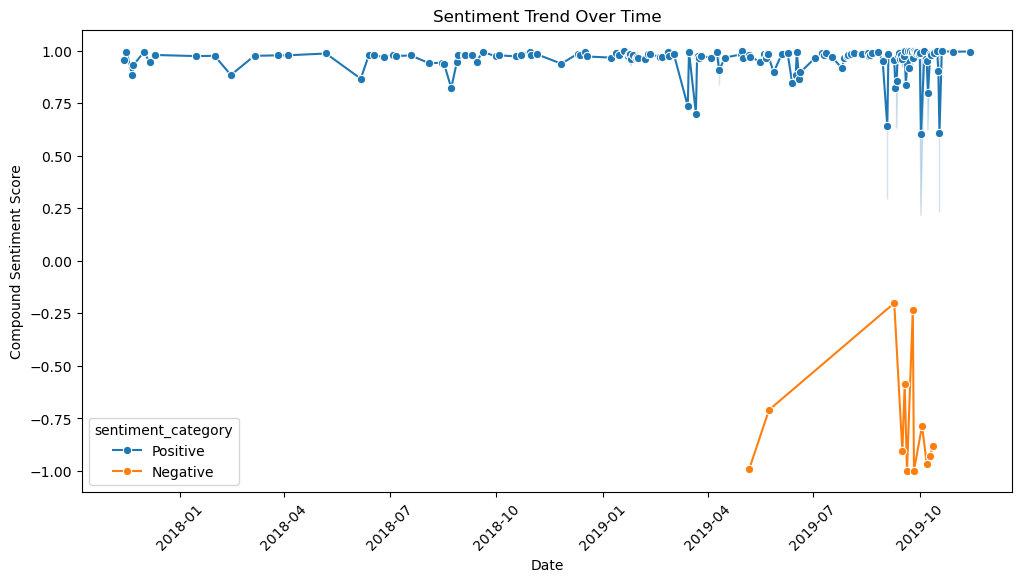

In [11]:
import seaborn as sns

# Line Chart: Sentiment Over Time
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')

plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='compound_sentiment', data=df, marker='o', hue='sentiment_category')
plt.title('Sentiment Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Compound Sentiment Score')
plt.xticks(rotation=45)
plt.show()

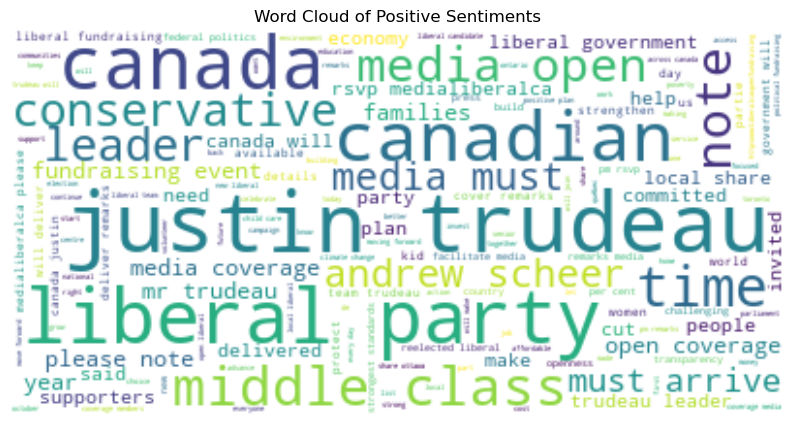

In [12]:
from wordcloud import WordCloud

# Word Cloud: Positive Sentiments
positive_text = " ".join(content for content in df[df['sentiment_category'] == 'Positive']['cleaned_content'])

wordcloud = WordCloud(background_color='white', max_words=200, contour_width=3, contour_color='steelblue').generate(positive_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Positive Sentiments')
plt.axis('off')
plt.show()

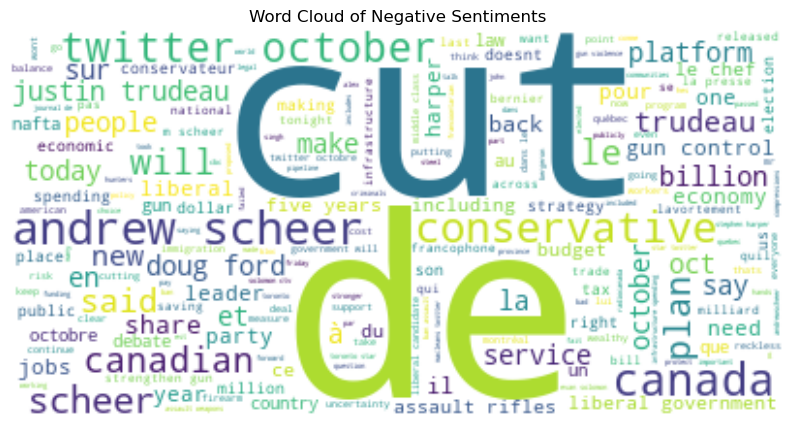

In [13]:
# Word Cloud: Negative Sentiments
negative_text = " ".join(content for content in df[df['sentiment_category'] == 'Negative']['cleaned_content'])

wordcloud = WordCloud(background_color='white', max_words=200, contour_width=3, contour_color='firebrick').generate(negative_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Negative Sentiments')
plt.axis('off')
plt.show()

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=1000)

# Fit and transform the cleaned text data
X = vectorizer.fit_transform(df['cleaned_content'])

In [15]:
from sklearn.model_selection import train_test_split

# Assuming you have a 'Sentiment' column with labels
X_train, X_test, y_train, y_test = train_test_split(X, df['sentiment_category'], test_size=0.2, random_state=42)

In [16]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
# Support Vector Machine
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

Accuracy: 0.9
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         4
    Positive       0.90      1.00      0.95        36

    accuracy                           0.90        40
   macro avg       0.45      0.50      0.47        40
weighted avg       0.81      0.90      0.85        40



C:\Users\Yathin Muthavarapu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Yathin Muthavarapu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Yathin Muthavarapu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [17]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

Accuracy: 0.9
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         4
    Positive       0.90      1.00      0.95        36

    accuracy                           0.90        40
   macro avg       0.45      0.50      0.47        40
weighted avg       0.81      0.90      0.85        40



C:\Users\Yathin Muthavarapu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Yathin Muthavarapu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Yathin Muthavarapu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
